In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import glob
import pickle
import math

#from helperfunctions import *

# 1. Camera Calibration

## 1.1. Find Chessboard Corners.

In [2]:
# Prepare object points
nx = 9 # Number of inside corners in any given row
ny = 6 # Number of inside corners in any given column
showimages = False
# Read in and make a list of calibration images

# glob allows us to read in files with consistent file names
# e.g. calibration-1.jpg, calibration-2.jpg...
calibration_images = glob.glob("camera_cal/calibration*.jpg")

# Generate object points
object_point_grid = np.zeros((ny*nx, 3), np.float32)
object_point_grid[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Initialise image and object point arrays
objpoints = []
imgpoints = []
img_no_corners = [] #Calibration images in which opencv failed to find corners
img_corners = [] #Calibration images in which opencv failed to find corners
#plt.figure(figsize=(20, 30)) #Figure for calibration images
#plt.figtext(0.5,0.9,'Image with found corners', fontsize=22, ha='center')


In [4]:

for idx, fname in enumerate(calibration_images):

    # Read in image
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    # Parameters: (image, chessboard dims, param for any flags)
    # chessboard dims = inside corners, not squares.
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Fill image point and object point arrays
        imgpoints.append(corners)
        objpoints.append(object_point_grid)
        img_corners.append(fname)
    else:
        img_no_corners.append(fname)


if showimages:
    #Plot Images with corners
    plt.figure(figsize=(20, 30))
    plt.figtext(0.5,0.9,'Images with corners found', fontsize=22, ha='center')
    x=math.ceil(len(img_corners)/3)
    for i, p in enumerate(img_corners):
        plt.subplot(x, 3, i+1)
        plt.imshow(cv2.imread(p))
        plt.title(p)
        plt.axis('off')
    plt.show()

    #Plot Images with nocorners
    plt.figure(figsize=(20, 10))
    plt.figtext(0.5,0.9,'Images with no corners found', fontsize=22, ha='center')
    x=math.ceil(len(img_no_corners)/3)
    for i, p in enumerate(img_no_corners):
       plt.subplot(i/3+1, 3, i%3+1)
       plt.imshow(cv2.imread(p))
       plt.title(p)
       plt.axis('off')
    plt.show()


## 1.2 Compute the Camera Calibration Matrix and Distortion Coefficients

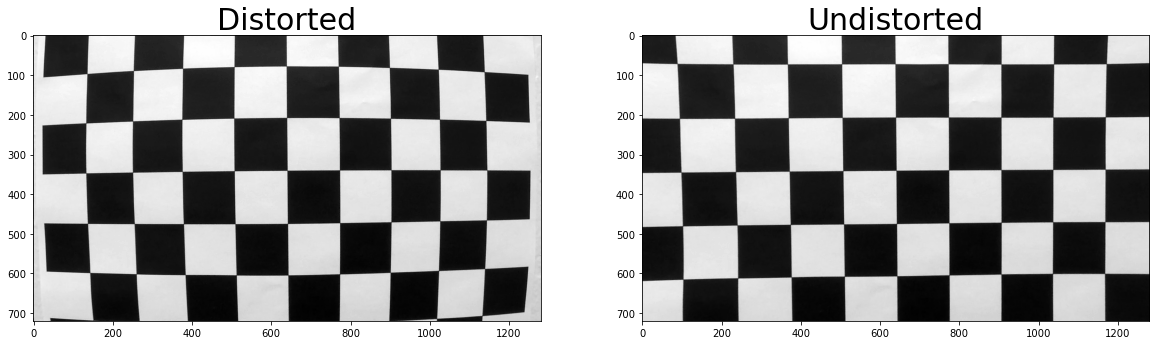

In [5]:
# Find the camera distortion from the image points discovered above
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,(720, 1280),None,None,)

# Create an example image with an undistortion operation applied
example_distorted_image = cv2.imread('camera_cal/calibration01.jpg')
example_distorted_image_grayscaled = cv2.cvtColor(example_distorted_image, cv2.COLOR_BGR2GRAY)
example_undistorted_image = cv2.undistort(example_distorted_image_grayscaled,mtx,dist)

# Display our example images
if showimages==False:
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(example_distorted_image_grayscaled, cmap='gray')
    plt.title('Distorted', fontsize=30)
    plt.subplot(122),plt.imshow(example_undistorted_image, cmap='gray')
    plt.title('Undistorted', fontsize=30)

## 1.3 Save the camera calibration result for later use


In [5]:
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "Project_Output/cam_calib_res.p", "wb" ) )